In [16]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx

In [73]:
al = '..\Data\out.moreno_crime_crime'
gender = '..\Data\ent.moreno_crime_crime.person.sex'
name = '..\Data\ent.moreno_crime_crime.person.name'
role = '..\Data\rel.moreno_crime_crime.person.role'

In [61]:
al_df = pd.read_csv(al, sep=" ", header=None)
al_df.drop(al_df.columns[len(al_df.columns)-1], axis=1, inplace=True)
al_df.head(3)

,0,1
0,1,1
1,1,2
2,1,3


In [62]:
gender_df = pd.read_csv(gender, sep=" ", header=None)
gender_df.head(3)

,0
0,1
1,1
2,1


In [63]:
name_df = pd.read_csv(name, sep=" ", header=None)
name_df.head(3)

,0
0,AbelDennis
1,AbramsChad
2,AbramsDavid


In [65]:
role_df = pd.read_csv(role, sep=",", header=None)
role_df.head(3)

NameError: name 'role' is not defined

In [36]:
from numpy import genfromtxt
import numpy as np
adjacency_list = genfromtxt(al, delimiter=' ')
print(adjacency_list)
print(type(adjacency_list))

[[  1.   1.]
 [  1.   2.]
 [  1.   3.]
 ...
 [827. 265.]
 [828. 298.]
 [829. 271.]]
<class 'numpy.ndarray'>


NetworkXError: random_state_index is incorrect

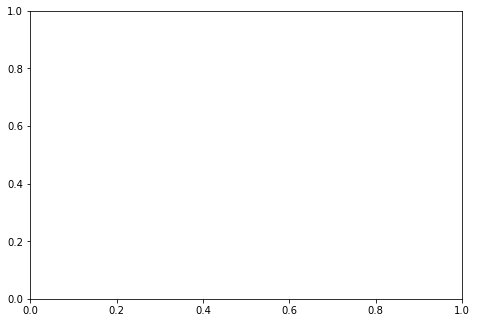

In [60]:
# create networkx graph
G=nx.Graph()

# add nodes
for i in range(len(al_df)):
    G.add_node(i, )
# for node in nodes:
#     G.add_node(node)

# add edges
for i in range(len(al_df)):
    G.add_edge(al_df[0][i], al_df[1][i])
    # G.add_edge(edge[0], edge[1])

nx.draw(G)

In [50]:
import matplotlib.pyplot as plt
import networkx as nx

def show_graph_with_labels(adjacency_matrix, mylabels):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=500, labels=mylabels, with_labels=True)
    plt.show()

show_graph_with_labels(adjacency_list, make_label_dict(get_labels(al)))

NameError: name 'get_labels' is not defined

In [45]:
# input_data = pd.read_csv(al, index_col=0)
G = nx.DiGraph(al_df.values)
nx.draw(G)

NetworkXError: Input is not a correct numpy matrix or array.